<a href="https://colab.research.google.com/github/esdrasantos/statistical-concepts-and-practice/blob/main/cstfm_mod_9_anova_2_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import numpy as np
import pandas as pd

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Data

In [208]:
dados = pd.read_excel('/content/drive/MyDrive/Curso de Estatísticas - Fórmulas e Métodos.xlsx', sheet_name='ANOVA 2 VIAS')

# Cleaning

In [209]:
print(dados.head())

         Nivel   Educacao  Financas  Medicina  Unnamed: 4  \
0  Ensino Médio      18.0      25.0      26.0         NaN   
1     Graduação      35.0      45.0      43.0         NaN   
2      Mestrado      46.0      58.0      62.0         NaN   
3     Doutorado      75.0      90.0     110.0         NaN   
4           NaN       NaN       NaN       NaN         NaN   

                         Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0  Anova: fator duplo sem repetição        NaN        NaN        NaN   
1                               NaN        NaN        NaN        NaN   
2                            RESUMO   Contagem       Soma      Média   
3                      Ensino Médio          3         69         23   
4                         Graduação          3        123         41   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12 Unnamed: 13  
0        NaN         NaN         NaN          NaN         NaN  
1        NaN         NaN         NaN          NaN         NaN  
2  Variâ

In [210]:
# Manter só as colunas indicadas:

dados = dados[['Nivel ', 'Educacao', 'Financas', 'Medicina']]
dados.head()

,Nivel,Educacao,Financas,Medicina
0,Ensino Médio,18.0,25.0,26.0
1,Graduação,35.0,45.0,43.0
2,Mestrado,46.0,58.0,62.0
3,Doutorado,75.0,90.0,110.0
4,NaN,NaN,NaN,NaN


In [211]:
dados.columns = ['Nivel', 'Educacao', 'Financas', 'Medicina']
dados.head()

,Nivel,Educacao,Financas,Medicina
0,Ensino Médio,18.0,25.0,26.0
1,Graduação,35.0,45.0,43.0
2,Mestrado,46.0,58.0,62.0
3,Doutorado,75.0,90.0,110.0
4,NaN,NaN,NaN,NaN


In [212]:
dados = dados.dropna()
dados

,Nivel,Educacao,Financas,Medicina
0,Ensino Médio,18.0,25.0,26.0
1,Graduação,35.0,45.0,43.0
2,Mestrado,46.0,58.0,62.0
3,Doutorado,75.0,90.0,110.0


# Transforming

In [213]:
df_long = dados.melt(id_vars=['Nivel'],
                  value_vars=['Educacao', 'Financas', 'Medicina'],
                  var_name='Area',
                  value_name='Salario')
df_long.head()


,Nivel,Area,Salario
0,Ensino Médio,Educacao,18.0
1,Graduação,Educacao,35.0
2,Mestrado,Educacao,46.0
3,Doutorado,Educacao,75.0
4,Ensino Médio,Financas,25.0


In [214]:
df_long.columns = ['Formacao', 'Area', 'Salario']
df_long.head()

,Formacao,Area,Salario
0,Ensino Médio,Educacao,18.0
1,Graduação,Educacao,35.0
2,Mestrado,Educacao,46.0
3,Doutorado,Educacao,75.0
4,Ensino Médio,Financas,25.0


# Descriptive Statistics

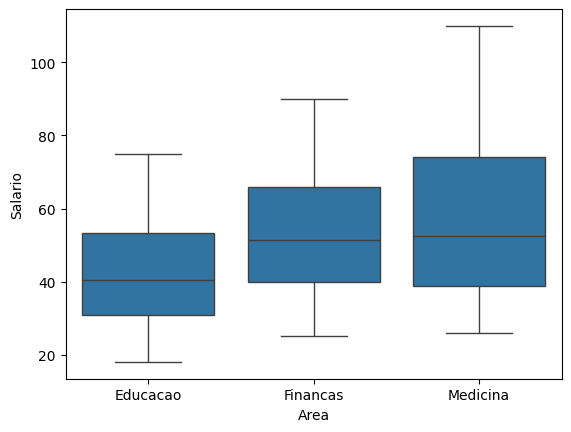

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Area', y='Salario', data=df_long)
plt.show()

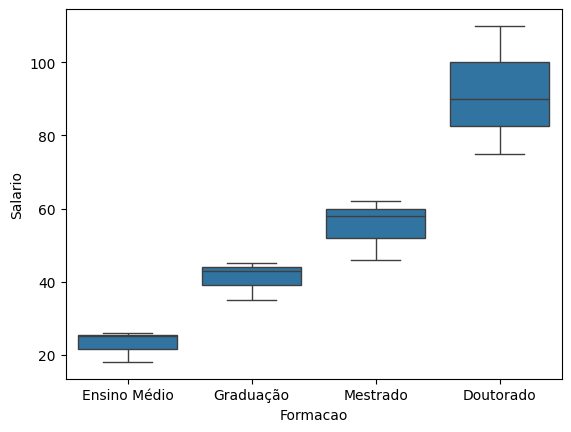

In [216]:
sns.boxplot(x='Formacao', y='Salario', data=df_long)
plt.show()

# ANOVA Table for 1 or 2 Factor

In [217]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('Salario ~ Area', data=df_long).fit()
tb_anova = sm.stats.anova_lm(model, typ=2)
print('Table for Salario ~ Area')
print(tb_anova)

Table for Salario ~ Area
           sum_sq   df        F    PR(>F)
Area       579.50  2.0  0.32998  0.727281
Residual  7902.75  9.0      NaN       NaN


In [218]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('Salario ~ Formacao', data=df_long).fit()
tb_anova = sm.stats.anova_lm(model, typ=2)
print('Table for Salario ~ Formacao')
print(tb_anova)

Table for Salario ~ Formacao
               sum_sq   df          F    PR(>F)
Formacao  7632.916667  3.0  23.965201  0.000237
Residual   849.333333  8.0        NaN       NaN


In [219]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# First is the numeric column, always. Then, the categorics.
model = smf.ols('Salario ~ Area + Formacao', data=df_long).fit()
tb_anova = sm.stats.anova_lm(model, typ=2)
print('Table for Salario ~ Area + Formacao')
print(tb_anova)

Table for Salario ~ Area + Formacao
               sum_sq   df          F    PR(>F)
Area       579.500000  2.0   6.442866  0.032067
Formacao  7632.916667  3.0  56.575046  0.000086
Residual   269.833333  6.0        NaN       NaN


# Analysing Residues (Erros)

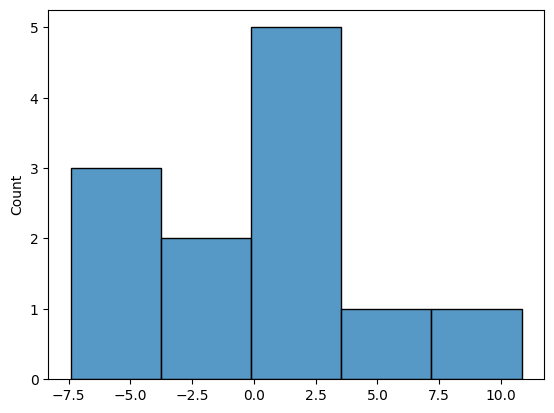

In [220]:
residue = model.resid
sns.histplot(residue)
plt.show()

In [221]:
print(residue.head())

0    4.250000
1    3.250000
2   -0.083333
3   -7.416667
4    0.250000
dtype: float64


# Shapiro Test (for Distribution of Residues)

Is it a normal distribution? \
That's what shapiro's answears

In [222]:
import scipy.stats as stats

stat, pvalue= stats.shapiro(residue)

print('stat=%.3f, p-value=%.3f' % (stat, pvalue))

stat=0.963, p-value=0.831


In [223]:
# DECISION

alpha = 0.05

if pvalue > alpha:
  print('Distribution is normal')
else:
  print('Distribution is not normal')

Distribution is normal


# QQ Plot

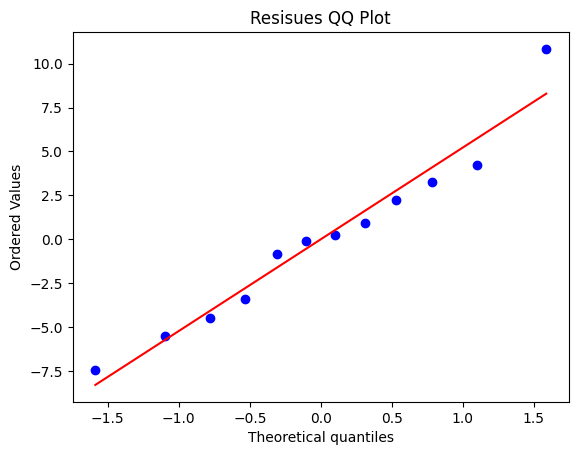

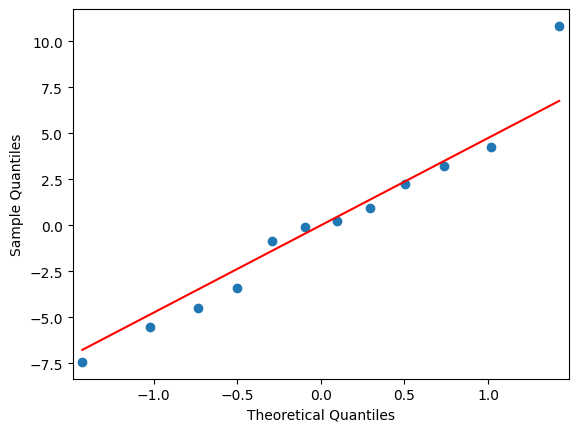

In [224]:
import matplotlib.pyplot as plt

stats.probplot(residue, dist='norm', plot=plt)
plt.title('Resisues QQ Plot')
plt.show()

sm.qqplot(residue, line='s')
plt.show()

# ANOVA Table - 2 Factors with Interation


In [225]:
df_long = df_long.dropna()
df_long

,Formacao,Area,Salario
0,Ensino Médio,Educacao,18.0
1,Graduação,Educacao,35.0
2,Mestrado,Educacao,46.0
3,Doutorado,Educacao,75.0
4,Ensino Médio,Financas,25.0
5,Graduação,Financas,45.0
6,Mestrado,Financas,58.0
7,Doutorado,Financas,90.0
8,Ensino Médio,Medicina,26.0
9,Graduação,Medicina,43.0


In [226]:
# Just verifying relationship...

print('Counting pairs Area ~ Formacao')
print(df_long.groupby(['Area', 'Formacao']).size())

print('Counting pairs Formacao ~ Area')
print(df_long.groupby(['Formacao','Area']).size())

Counting pairs Area ~ Formacao
Area      Formacao    
Educacao  Doutorado       1
          Ensino Médio    1
          Graduação       1
          Mestrado        1
Financas  Doutorado       1
          Ensino Médio    1
          Graduação       1
          Mestrado        1
Medicina  Doutorado       1
          Ensino Médio    1
          Graduação       1
          Mestrado        1
dtype: int64
Counting pairs Formacao ~ Area
Formacao      Area    
Doutorado     Educacao    1
              Financas    1
              Medicina    1
Ensino Médio  Educacao    1
              Financas    1
              Medicina    1
Graduação     Educacao    1
              Financas    1
              Medicina    1
Mestrado      Educacao    1
              Financas    1
              Medicina    1
dtype: int64


In [227]:
import warnings

warnings.filterwarnings("error", category=RuntimeWarning)

In [228]:
try:

  model2 = smf.ols('Salario ~ Area + Formacao + Area:Formacao', data=df_long).fit()
  tb_anova2 = sm.stats.anova_lm(model2, typ=1)

except RuntimeWarning as e:
  print("Error occurred. Verify colinearity between factors. Also size of observations in each factor relation must be greater than 1.", e.args)
finally:
  print()
  print('Table for Salario ~ Area + Formacao + Area:Formacao')
  print(tb_anova2)

Error occurred. Verify colinearity between factors. Also size of observations in each factor relation must be greater than 1. ('divide by zero encountered in scalar divide',)

Table for Salario ~ Area + Formacao + Area:Formacao
                 df        sum_sq      mean_sq           F        PR(>F)
Area            2.0   1580.166667   790.083333   70.578164  8.867318e-11
Formacao        3.0  24782.888889  8260.962963  737.952026  9.281977e-24
Area:Formacao   6.0    352.277778    58.712963    5.244830  1.416767e-03
Residual       24.0    268.666667    11.194444         NaN           NaN


# Creating new data source for test interaction between factors
Yes, we had a problem with the last one...

In [229]:
dados_ = [('Ensino Medio', 18.0, 25.0, 26.0),
          ('Ensino Medio', 21.0, 27.0, 29.0),
          ('Ensino Medio', 17.0, 22.0, 25.0),
          ('Graduação', 35.0, 45.0, 43.0),
          ('Graduação', 37.0, 42.0, 46.0),
          ('Graduação', 32.0, 43.0, 47.0),
          ('Mestrado', 46.0, 58.0, 62.0),
          ('Mestrado', 48.0, 60.0, 64.0),
          ('Mestrado', 42.0, 55.0, 66.0),
          ('Doutorado', 75.0, 90.0, 110.0),
          ('Doutorado', 80.0, 92.0, 105.0),
          ('Doutorado', 89.0, 100.0, 110.0)]

df_ = pd.DataFrame(dados_, columns=['Nivel', 'Educacao', 'Financas', 'Medicina'])
df_.head()

,Nivel,Educacao,Financas,Medicina
0,Ensino Medio,18.0,25.0,26.0
1,Ensino Medio,21.0,27.0,29.0
2,Ensino Medio,17.0,22.0,25.0
3,Graduação,35.0,45.0,43.0
4,Graduação,37.0,42.0,46.0


In [230]:
df_long_ = df_.melt(id_vars=['Nivel'],
                  value_vars=['Educacao', 'Financas', 'Medicina'],
                  var_name='Area',
                  value_name='Salario')
print(df_long_.head())

          Nivel      Area  Salario
0  Ensino Medio  Educacao     18.0
1  Ensino Medio  Educacao     21.0
2  Ensino Medio  Educacao     17.0
3     Graduação  Educacao     35.0
4     Graduação  Educacao     37.0


In [231]:
df_long_.columns = ['Formacao', 'Area', 'Salario']
print(df_long_.head())

       Formacao      Area  Salario
0  Ensino Medio  Educacao     18.0
1  Ensino Medio  Educacao     21.0
2  Ensino Medio  Educacao     17.0
3     Graduação  Educacao     35.0
4     Graduação  Educacao     37.0


In [232]:
# Just verifying relationship...

print('Counting pairs Area ~ Formacao')
print(df_long_.groupby(['Area', 'Formacao']).size())

print('Counting pairs Formacao ~ Area')
print(df_long_.groupby(['Formacao','Area']).size())

Counting pairs Area ~ Formacao
Area      Formacao    
Educacao  Doutorado       3
          Ensino Medio    3
          Graduação       3
          Mestrado        3
Financas  Doutorado       3
          Ensino Medio    3
          Graduação       3
          Mestrado        3
Medicina  Doutorado       3
          Ensino Medio    3
          Graduação       3
          Mestrado        3
dtype: int64
Counting pairs Formacao ~ Area
Formacao      Area    
Doutorado     Educacao    3
              Financas    3
              Medicina    3
Ensino Medio  Educacao    3
              Financas    3
              Medicina    3
Graduação     Educacao    3
              Financas    3
              Medicina    3
Mestrado      Educacao    3
              Financas    3
              Medicina    3
dtype: int64


In [233]:
try:

  model3 = smf.ols('Salario ~ Area + Formacao + Area:Formacao', data=df_long_).fit()
  tb_anova3 = sm.stats.anova_lm(model2, typ=1)

except RuntimeWarning as e:
  print("Error occurred. Verify colinearity between factors. Also size of observations in each factor relation must be greater than 1.", e.args)
finally:
  print()
  print('Table for Salario ~ Area + Formacao + Area:Formacao')
  print(tb_anova3)

Error occurred. Verify colinearity between factors. Also size of observations in each factor relation must be greater than 1. ('divide by zero encountered in scalar divide',)

Table for Salario ~ Area + Formacao + Area:Formacao
                 df        sum_sq      mean_sq           F        PR(>F)
Area            2.0   1580.166667   790.083333   70.578164  8.867318e-11
Formacao        3.0  24782.888889  8260.962963  737.952026  9.281977e-24
Area:Formacao   6.0    352.277778    58.712963    5.244830  1.416767e-03
Residual       24.0    268.666667    11.194444         NaN           NaN


PR(>F) or just p-values ​are considerably smaller than alpha = 0.05.\
Therefore, Ho is rejected, especially for interaction. Showing there is interaction between Area and Education, and both influence the Salary pattern.

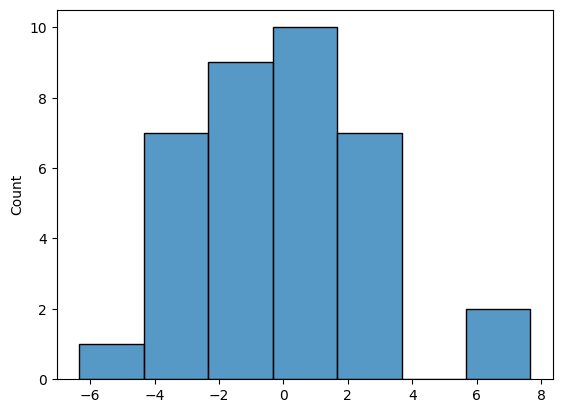

In [234]:
residue2 = model3.resid
sns.histplot(residue2)
plt.show()

In [235]:
# Shapiro test for residue normality

stat, pvalue= stats.shapiro(residue2)

print('stat=%.3f, p-value=%.3f' % (stat, pvalue))

stat=0.964, p-value=0.281


In [236]:
# Decision - Shapiro

alpha = 0.05

if pvalue > alpha:
  print('Distribution is normal')
else:
  print('Distribution is not normal')

Distribution is normal


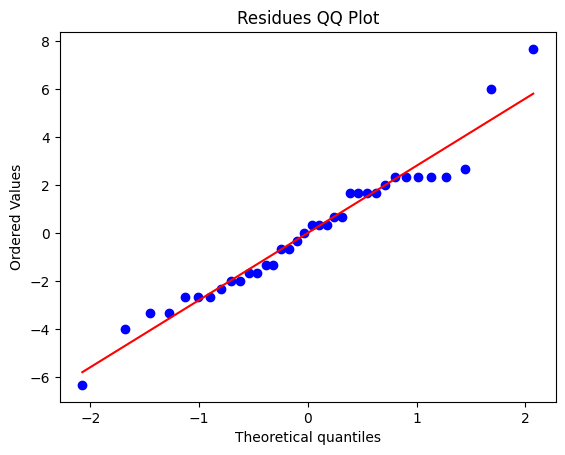

In [237]:
import matplotlib.pyplot as plt

stats.probplot(residue2, dist='norm', plot=plt)
plt.title('Residues QQ Plot')
plt.show()

# LEVENE'S TEST (for homoscedasticity)
If not rejected, each category (factor) have similar variances (statistically)

In [238]:
# As it is normal we can performe Levene's test
# LEVENE

from scipy.stats import levene

groups = df_long_.groupby(['Area','Formacao'])['Salario'].apply(list)

print(groups)

Area      Formacao    
Educacao  Doutorado          [75.0, 80.0, 89.0]
          Ensino Medio       [18.0, 21.0, 17.0]
          Graduação          [35.0, 37.0, 32.0]
          Mestrado           [46.0, 48.0, 42.0]
Financas  Doutorado         [90.0, 92.0, 100.0]
          Ensino Medio       [25.0, 27.0, 22.0]
          Graduação          [45.0, 42.0, 43.0]
          Mestrado           [58.0, 60.0, 55.0]
Medicina  Doutorado       [110.0, 105.0, 110.0]
          Ensino Medio       [26.0, 29.0, 25.0]
          Graduação          [43.0, 46.0, 47.0]
          Mestrado           [62.0, 64.0, 66.0]
Name: Salario, dtype: object


In [239]:
stat, p_valor = levene(*groups)

print('stat=%.3f, p-value=%.3f' % (stat, p_valor))

stat=0.593, p-value=0.816


In [240]:
# Decision for Levenes's

alpha = 0.05

if p_valor > alpha:
  print('Homoscedasticity: similar variances of categories')
else:
  print('Heteroscedasticity: different variances of categories')

Homoscedasticity: similar variances of categories
